<a href="https://colab.research.google.com/github/m-vigneshwar-reddy/Using-Data-Science-to-Find-Profitable-Ad-Supported-Apps-from-Google-Play-Store/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1>*project:* **using data science to find the profitable  ad-supported app from palystore**  </h1>

in this project, we will be data analysis to find out the profitable apps with ad-spport for an company , you’ll analyze real app market data to find app profiles that attract the most users.

 **Project** **overview:**<br>
In this project, you’ll assume the role of a data analyst at a company that builds free, ad-supported apps for Android and iOS. Since the company’s revenue depends on in-app ads, your task is to analyze historical data from app markets to determine which kinds of apps attract the most users.

Using Python, you’ll clean the provided datasets and analyze them using frequency tables and averages to identify trends. By working through a complete data science workflow, you’ll develop hands-on experience in data-driven decision making to inform business strategy. Finally, you’ll make recommendations on the app profiles the company should pursue to maximize users and ad revenue.

Objective: Analyze mobile app market data to recommend app development strategies that maximize user engagement and advertising profits.

**project** **steps:**<br>
*step 1:*

🔧 **step 0:** Import Required Libraries

Decision: Import standard and Kaggle libraries.



pandas – for data manipulation.

KaggleApi – to programmatically access datasets from Kaggle.

*   os – for setting environment variables.



In [13]:
import os
os.environ['KAGGLE_USERNAME'] = 'your_kaggle_username'
os.environ['KAGGLE_KEY'] = 'your_kaggle_key_from_json'

import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi




In [14]:
# Step 1: Set up Kaggle credentials
api = KaggleApi()
api.authenticate()



In [15]:
# Step 2: Download and unzip the dataset
api.dataset_download_files('lava18/google-play-store-apps', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/lava18/google-play-store-apps


In [16]:
# Step 3: Read the CSV file
df = pd.read_csv('googleplaystore.csv')
print(df.head())
#print(df)

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [17]:
#l = list(df)
#print(type(df))
#print(df['App'])
#print('length:',len( set(df['App'])))

In [18]:
df = df.drop_duplicates(subset=['App'])
#print(df)

In [19]:
df1 = df[df['Type']=='Free']
#print(df1)

In [20]:
print(list(df))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [21]:
df1.loc[:,'Installs'] = df1['Installs'].astype(str).replace('[+,]','',regex = True).astype(int)
#print(df1)

In [22]:
df1 = df1.sort_values(by=['Installs','Rating'],ascending=False)
#print(df1)

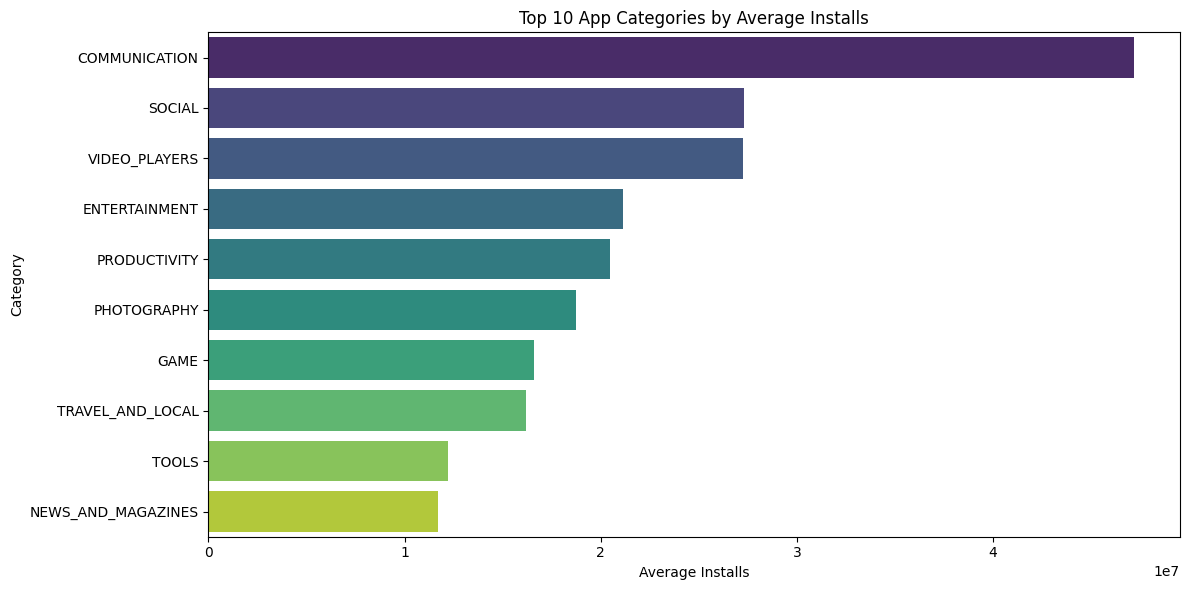

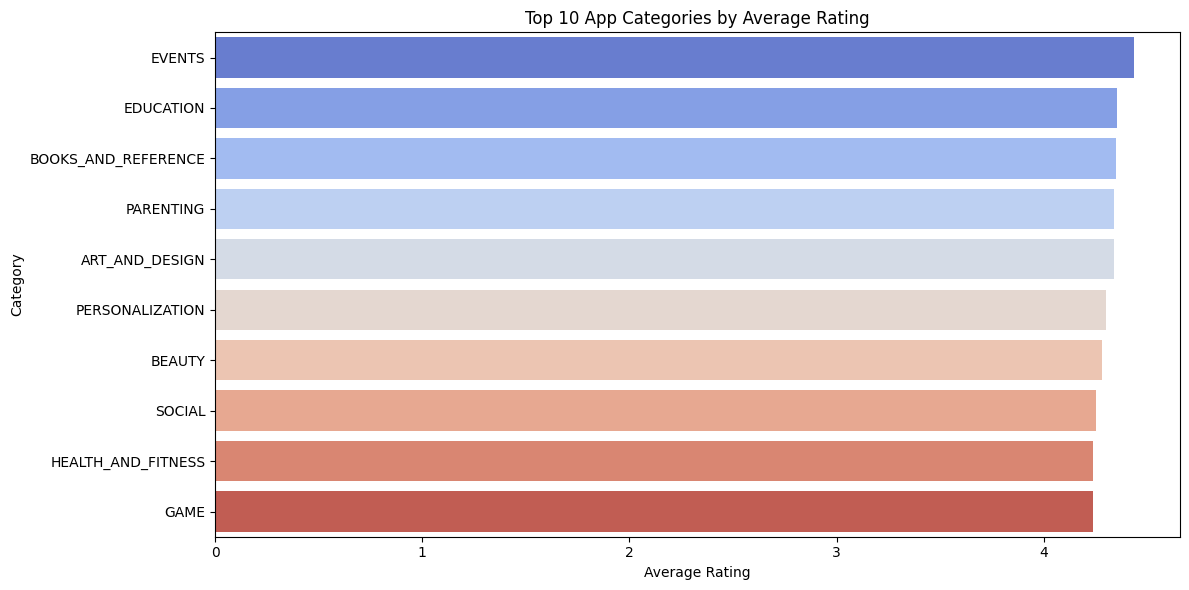


💸 Top 10 Revenue-Generating Free Apps (Estimated):

                             App             Category    Installs  \
0                 Subway Surfers                 GAME  1000000000   
1                        Google+               SOCIAL  1000000000   
2                      Instagram               SOCIAL  1000000000   
3        Google Play Movies & TV        VIDEO_PLAYERS  1000000000   
4                    Google News   NEWS_AND_MAGAZINES  1000000000   
5              Google Play Books  BOOKS_AND_REFERENCE  1000000000   
6                       Hangouts        COMMUNICATION  1000000000   
7                       Facebook               SOCIAL  1000000000   
8  Skype - free IM & video calls        COMMUNICATION  1000000000   
9             Google Street View     TRAVEL_AND_LOCAL  1000000000   

  Estimated_Revenue_USD  
0           150000000.0  
1           150000000.0  
2           150000000.0  
3           150000000.0  
4           150000000.0  
5           150000000.0  
6    

In [24]:
# 📊 Additional Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# 🧹 Clean Rating and Category Columns for Visualization
df1['Rating'] = pd.to_numeric(df1['Rating'], errors='coerce')
df1.dropna(subset=['Category', 'Rating'], inplace=True)

# 📈 Group by Category to Analyze Installs and Ratings
category_summary = df1.groupby('Category').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'App': 'count'
}).rename(columns={'App': 'App_Count'}).sort_values(by='Installs', ascending=False)
category_summary.reset_index(inplace=True)

# 📊 Plot 1: Top 10 Categories by Average Installs
plt.figure(figsize=(12, 6))
sns.barplot(x='Installs', y='Category', data=category_summary.head(10), hue='Category',
    palette='viridis',
    dodge=False,
    legend=False  )
plt.title('Top 10 App Categories by Average Installs')
plt.xlabel('Average Installs')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 📊 Plot 2: Top 10 Categories by Average Rating
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Category', data=category_summary.sort_values(by='Rating', ascending=False).head(10), hue='Category',
    palette='coolwarm',
    dodge=False,
    legend=False)
plt.title('Top 10 App Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 💰 Estimate Ad Revenue Based on Installs
CPM = 1.5  # Cost per 1000 impressions
AD_IMPRESSIONS_PER_USER = 100  # Est. impressions per user

df1['Estimated_Revenue_USD'] = (df1['Installs'] * AD_IMPRESSIONS_PER_USER * CPM) / 1000

# 📄 Top 10 Revenue-Generating Apps
top_revenue_apps = df1[['App', 'Category', 'Installs', 'Estimated_Revenue_USD']].sort_values(
    by='Estimated_Revenue_USD', ascending=False).head(10)

print("\n💸 Top 10 Revenue-Generating Free Apps (Estimated):\n")
print(top_revenue_apps.reset_index(drop=True))


In [25]:
l = list(df1['App'][0:100])
for i in range(0,100):
  print(i+1,' ',l[i])

1   Subway Surfers
2   Instagram
3   Google Photos
4   WhatsApp Messenger
5   Google
6   Google Drive
7   Google Chrome: Fast & Secure
8   Gmail
9   Google Play Games
10   Maps - Navigate & Explore
11   YouTube
12   Google+
13   Google Street View
14   Skype - free IM & video calls
15   Facebook
16   Messenger – Text and Video Chat for Free
17   Hangouts
18   Google Play Books
19   Google News
20   Google Play Movies & TV
21   Clean Master- Space Cleaner & Antivirus
22   Security Master - Antivirus, VPN, AppLock, Booster
23   Google Duo - High Quality Video Calls
24   SHAREit - Transfer & Share
25   UC Browser - Fast Download Private & Secure
26   My Talking Tom
27   Microsoft Word
28   MX Player
29   Candy Crush Saga
30   Google Translate
31   Dropbox
32   Flipboard: News For Our Time
33   Viber Messenger
34   imo free video calls and chat
35   Temple Run 2
36   Pou
37   Facebook Lite
38   Twitter
39   Samsung Health
40   LINE: Free Calls & Messages
41   Gboard - the Google Keyboard
4